In [1]:
import matplotlib
%matplotlib notebook
import numpy as np

#matplotlib.use('nbAgg')
from matplotlib import pyplot as plt
import sys
sys.path.append("Z:\Code\PythonCode")
import tiff_file

tiff_file.py:1995: UserWarning: failed to import _tifffile.decodepackbits
  warnings.warn("failed to import %s" % module_function)
tiff_file.py:1995: UserWarning: failed to import _tifffile.decodelzw
  warnings.warn("failed to import %s" % module_function)
tiff_file.py:1995: UserWarning: failed to import _tifffile.unpackints
  warnings.warn("failed to import %s" % module_function)


In [2]:
# Graphing helper function
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

In [3]:
im = tiff_file.imread("sd_testimage.tif")*1.0

<IPython.core.display.Javascript object>


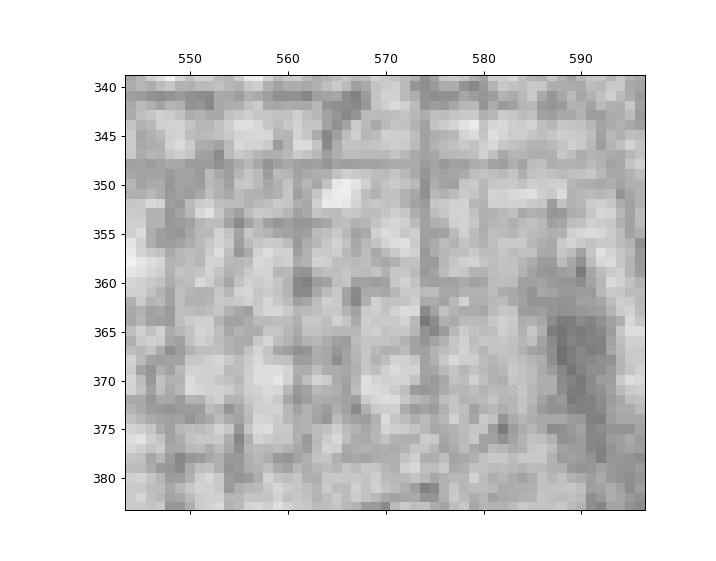

In [4]:
plt.matshow(im,cmap='gray')

In [5]:
ft_im = np.fft.fftshift(np.fft.fft2(im-im.mean()))

<IPython.core.display.Javascript object>


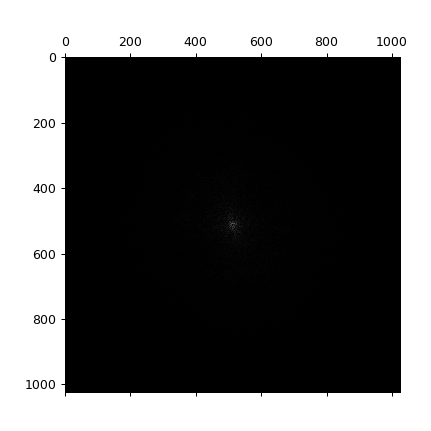

In [6]:
plt.matshow(np.abs(ft_im),cmap='gray')

C:\Users\RMCGORTY\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


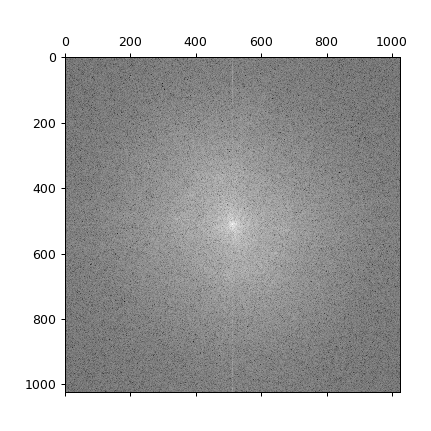

In [8]:
plt.matshow(np.log(np.abs(ft_im)),cmap='gray')

<IPython.core.display.Javascript object>


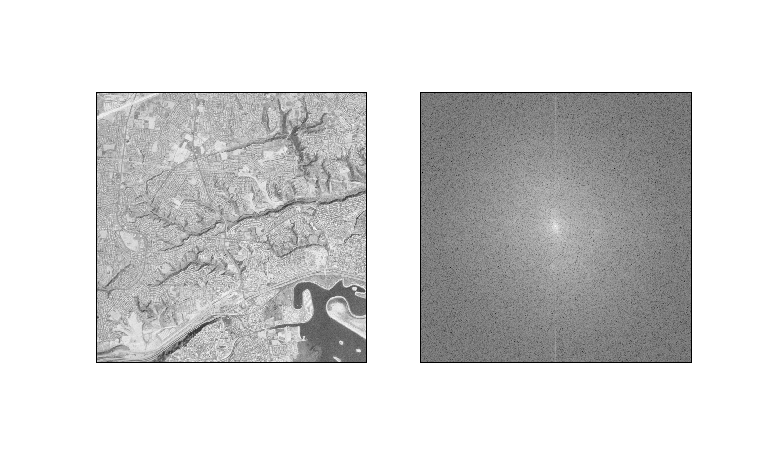

C:\Users\RMCGORTY\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


[]

In [13]:
fig = plt.figure()
ax = fig.add_subplot(121)
plt.matshow(im,fignum=0,cmap='gray')
ax.set_xticks([]); ax.set_yticks([])
ax = fig.add_subplot(122)
plt.matshow(np.log(np.abs(ft_im)),fignum=0,cmap='gray')
ax.set_xticks([]); ax.set_yticks([])

<IPython.core.display.Javascript object>


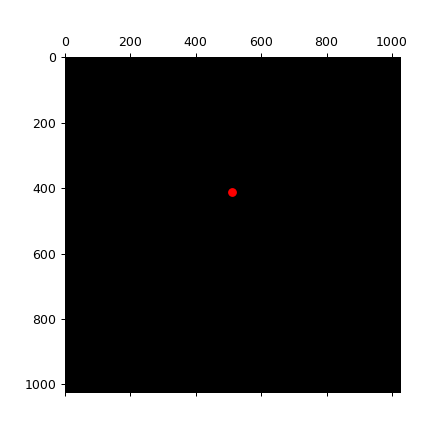

<IPython.core.display.Javascript object>


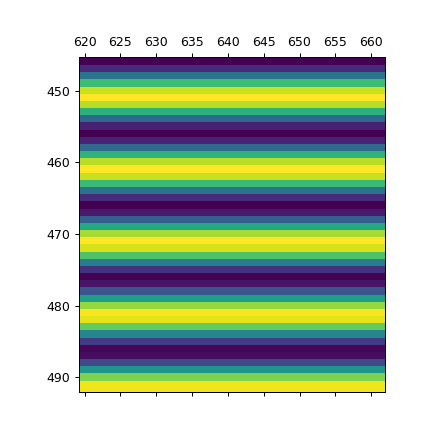

In [12]:
mask = np.zeros_like(np.abs(ft_im))
mask[511,511]=1.0
x,y = 410, 511
mask[x,y]=1.0
plt.matshow(np.abs(ft_im)*mask,cmap='gray')
plt.plot(y,x,'ro')
new_image = np.fft.ifft2(ft_im*mask)
plt.matshow(np.abs(new_image))

<IPython.core.display.Javascript object>


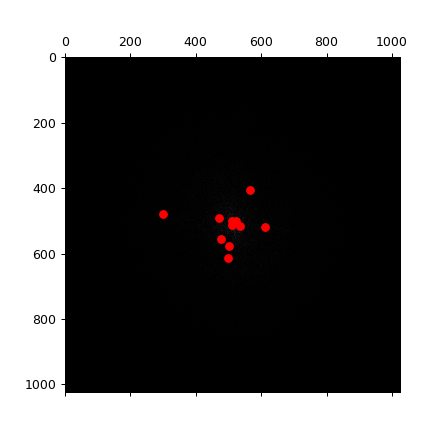

<IPython.core.display.Javascript object>


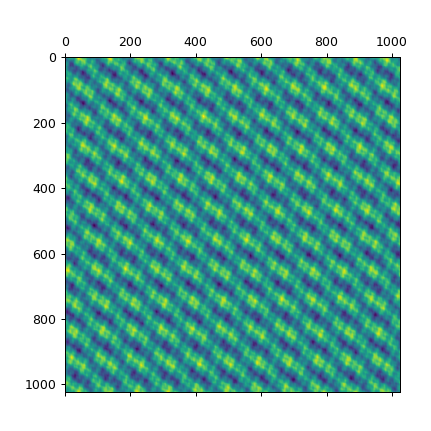

In [33]:
mask = np.zeros_like(np.abs(ft_im))
plt.matshow(np.abs(ft_im),cmap='gray')
for x,y in [[511,511],[500,511],[490,470],[480,300],[612,500],[405,565],[577,502],[555,477],[499,522],[519,612],[514,534]]:
    mask[x,y]=1.0
    plt.plot(y,x,'ro')
new_image = np.fft.ifft2(ft_im*mask)
plt.matshow(np.abs(new_image))

<IPython.core.display.Javascript object>


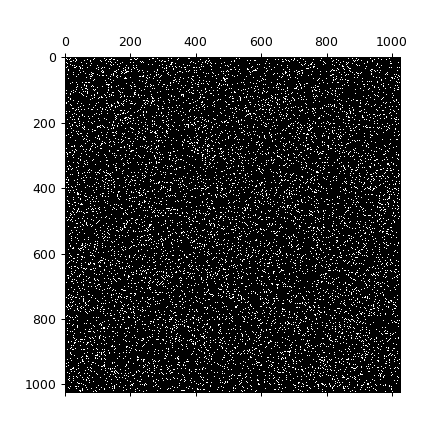

<IPython.core.display.Javascript object>


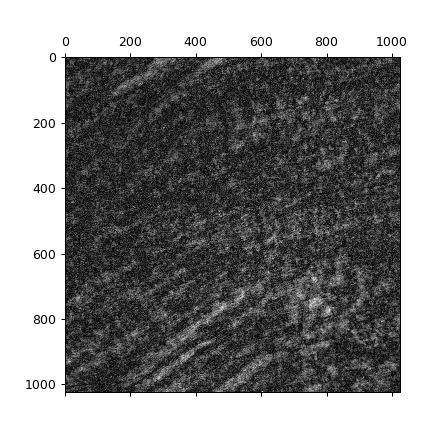

In [66]:
mask = np.zeros_like(np.abs(ft_im)); mask[511,511]=1.0
#plt.matshow(np.abs(ft_im),cmap='gray')
for x,y in np.random.randint(0,1023,size=(10000,2)):
    mask[x,y]=1.0
    mask[x-1,y-1]=1.0; mask[x-1,y+1]=1.0; mask[x+1,y-1]=1.0; mask[x+1,y+1]=1.0
    mask[x,y-1]=1.0; mask[x,y+1]=1.0; mask[x+1,y]=1.0; mask[x-1,y]=1.0
    #plt.plot(y,x,'r.')
plt.matshow(mask,cmap='gray')
new_image = np.fft.ifft2(ft_im*mask)
plt.matshow(np.abs(new_image),cmap='gray')

<IPython.core.display.Javascript object>


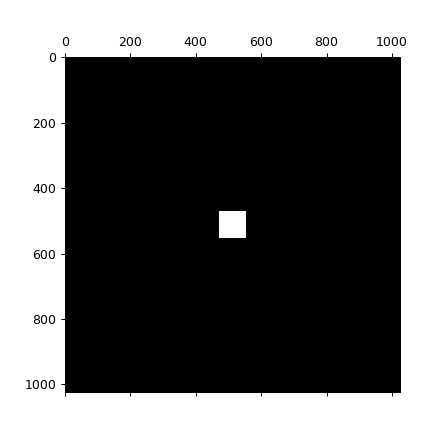

<IPython.core.display.Javascript object>


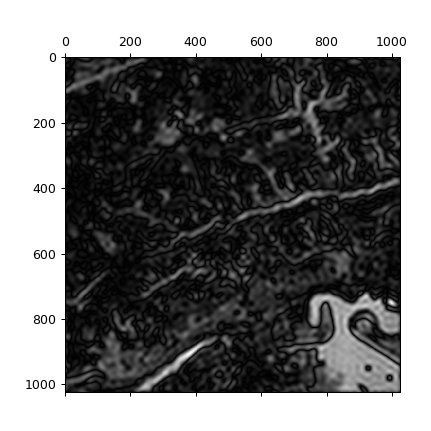

In [71]:
mask = np.zeros_like(np.abs(ft_im));
mask[472:552,472:552] = 1
new_im = np.fft.ifft2(ft_im*mask)
plt.matshow(mask,cmap='gray')
plt.matshow(np.abs(new_im),cmap='gray')

<IPython.core.display.Javascript object>


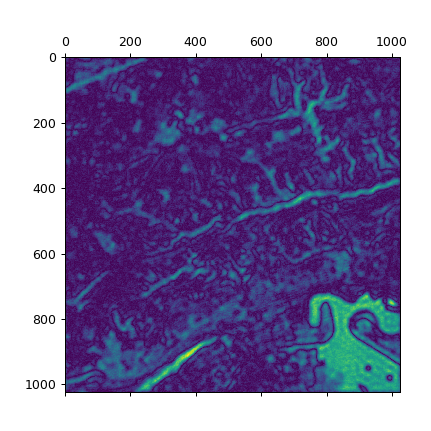

<IPython.core.display.Javascript object>


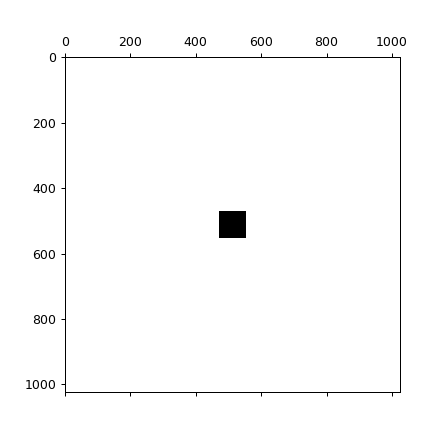

<IPython.core.display.Javascript object>


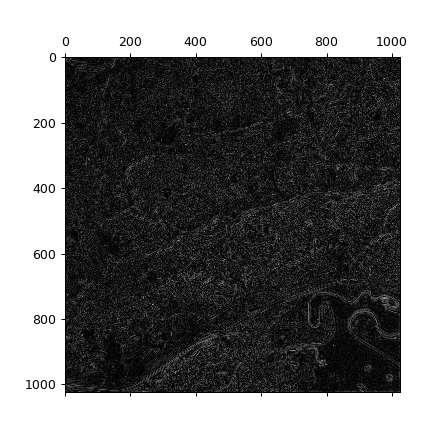

In [72]:
inverse_mask = np.abs(mask-1)
new_im = np.fft.ifft2(ft_im*inverse_mask)
plt.matshow(inverse_mask,cmap='gray')
plt.matshow(np.abs(new_im),cmap='gray')